<a href="https://colab.research.google.com/github/a12leja/-DataScienceFem365_RetoII---TEAM-ParSel-snake-/blob/main/nobel_laureates_1901_present.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://i.ibb.co/DWSqtc1/Encabezado.png" alt="descargar" border="0" width=900px>

# **NOBEL LAUREATES, 1901-PRESENT**

<img src="https://storage.googleapis.com/kaggle-datasets-images/839/1538/55e662cc1582bb664efd7eeac6d78825/dataset-cover.jpeg" alt="descargar" border="0" height=200px>

> **Link del challenge:** 
>
> https://www.kaggle.com/nobelfoundation/nobel-laureates

---
> **Data: archive.csv** 
  - Este conjunto de datos incluye un registro de cada individuo u organización que recibió el Premio Nobel desde 1901.
  -  Estos datos del premio Nobel se obtuvieron de la API del Premio Nobel

## Comprension del reto

**Contexto**

Entre 1901 y 2016, los Premios Nobel y el Premio de Ciencias Económicas se otorgaron 579 veces a 911 personas y organizaciones. El Premio Nobel es un premio internacional administrado por la Fundación Nobel en Estocolmo, Suecia, y basado en la fortuna de Alfred Nobel, inventor y empresario sueco. En 1968, el Sveriges Riksbank estableció el Premio Sveriges Riksbank en Ciencias Económicas en memoria de Alfred Nobel, fundador del Premio Nobel. 

Cada premio consta de una medalla, un diploma personal y un premio en efectivo.

Una persona u organización galardonada con el Premio Nobel se denomina Premio Nobel. La palabra "laureado" se refiere al significado de la corona de laurel. En la antigua Grecia, se otorgaban coronas de laurel a los vencedores como señal de honor.

## IMPORTACION DE LIBRERIAS

In [2]:
!pip install wordcloud 

In [3]:
# Importacion de Librerias
import os # Para la lectura de nuestos archivos desde el computador
import pandas as pd # Manejo de data estructurada (Dataframe)
import matplotlib.pyplot as plt # Graficas
import seaborn as sns
import numpy as np

from wordcloud import WordCloud, STOPWORDS # Nube de Palabras

## RECOPILACIÓN DE LOS DATOS

In [4]:
# Importar los datos desde el repositorio
dataset = pd.read_csv("https://raw.githubusercontent.com/MayumyCH/dsfem_datachallenge_monthly/main/nobel_laureates_1901_present/data/archive.csv", 
                      sep = ",")

In [5]:
dataset.head(3)

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany


## DESCRIPCION DE LOS DATOS

In [6]:
dataset.shape

# INTERPRETACION:
# 969 observaciones
# 18 features/variables

(969, 18)

El dataset cuenta con 18 variables que se detallaran a continuacion:

| **VARIABLES**              | **DESCRIPCION**                                        |
|------------------------|----------------------------------------------------|
| **Year**                   | El año en que   se otorgó este noble premio‎        |
| **Category**               | Los distintos premios   nobel                      |
| **Prize**                  | premio                                             |
| **Motivation**             | Mensaje que dieron                                 |
| **Prize Share**            | Premio compartido   (1,1/2,1/3/1/4)                |
| **Laureate ID**            | id del galadonado                                  |
| **Laureate Type**          | tipo de galadonado (   indivifdual y organización) |
| **Full Name**              | Nombre                                             |
| **Birth Date**             | ‎Fecha de   nacimiento del receptor                 |
| **Birth City**             | ‎Ciudad natal del   receptor‎                        |
| **Birth Country**          | País de nacimiento                                 |
| **Sex**                    | Sexo                                               |
| **Organization   Name**    | Nombre de la   organización                        |
| **Organization   City**    | Organización Ciudad                                |
| **Organization   Country** | Organización País                                  |
| **Death Date**             | Fecha de la muerte                                 |
| **Death City**             | Ciudad de la Muerte                                |
| **Death Country**          | País de la muerte                                  |


## **PREGUNTAS A RESOLVER!**
1. **¿Qué país ha ganado más premios en cada categoría?**  
2. **¿Qué palabras se escriben con más frecuencia en la motivación del premio?** 
3. **¿Puede predecir la edad, el sexo y la nacionalidad de los premios Nobel del próximo año?** 

# RESOLUCION

In [7]:
# CANTIDAD DE NULOS POR CADA FEATURE
dataset.isnull().sum()
# 11 features/variables poseen variables nulas

Year                      0
Category                  0
Prize                     0
Motivation               88
Prize Share               0
Laureate ID               0
Laureate Type             0
Full Name                 0
Birth Date               29
Birth City               28
Birth Country            26
Sex                      26
Organization Name       247
Organization City       253
Organization Country    253
Death Date              352
Death City              370
Death Country           364
dtype: int64

## ANALIZANDO CADA VARIABLE

### VARIABLE "Sex"

In [8]:
groupSexo = dataset.groupby("Sex").agg({'Laureate ID':'count'})
groupSexo

,Laureate ID
Sex,
Female,50
Male,893


In [9]:
dataset.groupby(by=['Sex']).count()
group_Sexo = groupSexo['Laureate ID']
group_Sexo

Sex
Female     50
Male      893
Name: Laureate ID, dtype: int64

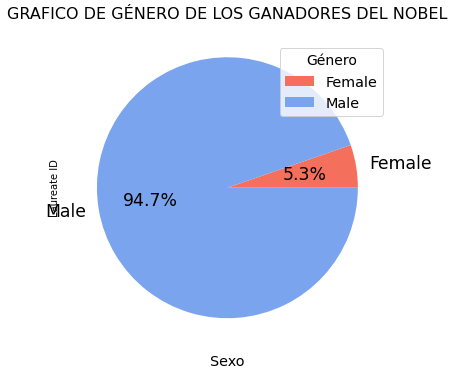

In [10]:
colores = ['#F56F5D', '#7AA5EE']
group_Sexo.plot(kind='pie',legend="True",autopct='%.1f%%',figsize=(6, 6),colors=colores,fontsize='xx-large')
plt.title('GRAFICO DE GÉNERO DE LOS GANADORES DEL NOBEL', fontdict={'fontsize':16})
plt.xlabel('Sexo',fontsize='x-large')
# plt.ylabel('Número de ganadores',fontsize='x-large')
plt.legend(loc='upper right', bbox_to_anchor=(1, 0.95),
           borderpad=0.4,fontsize='x-large',
           title="Género",title_fontsize=14)
plt.show()

In [11]:
by_category_sex = dataset.groupby(['Category','Sex'])
category_sex_count = by_category_sex['Category'].count()
category_sex_count.unstack()

Sex,Female,Male
Category,,
Chemistry,4,190
Economics,2,81
Literature,14,99
Medicine,12,215
Peace,16,88
Physics,2,220


In [12]:
# CONCLUSION DE ESTA VARIABLE
# - Se tiene que las mujeres solo ganaron el 5.3% de los premios nobel's en general
# - Las mujeres en donde han tenido mas premios es en: "Peace", "Literature" y en los que menos premios han tenido es: "Economics", "Physics"

## **¿Qué país ha ganado más premios en cada categoría?**  

In [ ]:
# PASO N°1: EVALUAR SI LA VARIABLE "Category" TIENE NULOS

dataset["Category"].isnull().sum()
# Nos damos cuenta que esa variable no tengo ningun nulo ok
# Por ende se podra proceder a agrupar por diferentes categorias

0

In [ ]:
# PASO N°2: CUANTAS CATEGORIAS SE TIENE EN LA DATA

groupcategoria = dataset.groupby('Category')['Category'].count()
print(groupcategoria)

Category
Chemistry     194
Economics      83
Literature    113
Medicine      227
Peace         130
Physics       222
Name: Category, dtype: int64


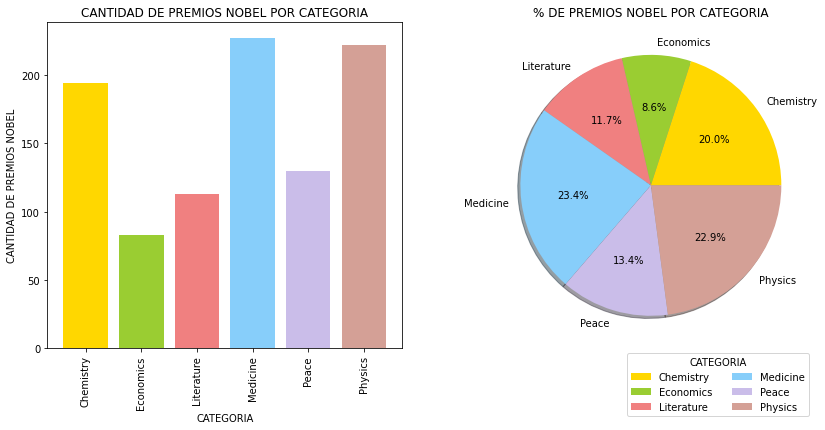

In [ ]:
# PASO N° 3: DESCRIPCION GRAFICA DE NUESTROS AGRUPAMIENTOS

fig, ax = plt.subplots(1, 2,figsize=(14, 6)) # Igual intervalos en las variables
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','#CABDE9', '#D4A096']
ax[0].bar(groupcategoria.index, groupcategoria.values, color=colors)
ax[1].pie(groupcategoria, autopct='%.1f%%',labels=groupcategoria.index,shadow=True,colors=colors)
ax[0].set_xticklabels(groupcategoria.index, rotation=90)
ax[1].legend(title="CATEGORIA",bbox_to_anchor =(1, 0), ncol = 2 ) # loc ="lower left" "center right"
ax[0].set_title("CANTIDAD DE PREMIOS NOBEL POR CATEGORIA")
ax[1].set_title("% DE PREMIOS NOBEL POR CATEGORIA")
ax[0].set_ylabel("CANTIDAD DE PREMIOS NOBEL")
ax[0].set_xlabel("CATEGORIA")
plt.show()

In [ ]:
dataset["Laureate Type"].isnull().sum()
# Nos damos cuenta que esa variable no tengo ningun nulo ok
# Por ende entonces sabremos que el premio fue entregado de forma individual organizacion

0

In [ ]:
by_category_laureatetype = dataset.groupby(['Category','Laureate Type'])
category_laureatetype = by_category_laureatetype['Category'].count()
category_laureatetype.unstack()

Laureate Type,Individual,Organization
Category,,
Chemistry,194.0,NaN
Economics,83.0,NaN
Literature,113.0,NaN
Medicine,227.0,NaN
Peace,100.0,30.0
Physics,222.0,NaN


Text(0, 0.5, 'CANTIDAD')

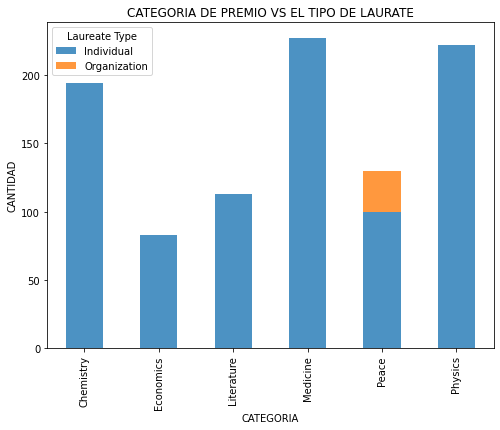

In [ ]:
by_category_laureatetype = dataset.groupby(['Category','Laureate Type'])
category_laureatetype = by_category_laureatetype['Category'].count()
total=category_laureatetype.unstack()
s_plot = total.plot(kind='bar',stacked=True,title="CATEGORIA DE PREMIO VS EL TIPO DE LAUREATE",figsize=(8,6),alpha = 0.8)
s_plot.set_xlabel("CATEGORIA")
s_plot.set_ylabel("CANTIDAD")

In [ ]:
by_category_sex = surveys_df.groupby(['Category','Sex'])
category_sex_count = by_category_sex['Category'].count()
total=category_sex_count.unstack()
s_plot = total.plot(kind='bar',stacked=True,title="Total year by category and sex")
s_plot.set_xlabel("Category")
s_plot.set_ylabel("Cantidad")

In [ ]:
# VEAMOS AHORA EN GRAFICA DE BARRAS LA COMPARACION DE PAISES VS LA CATEGORIA DE PREMIOS NOBEL'S
group_country_cant_nobel= dataset.groupby(by=['Birth Country']).count()
group_country_cant_nobel = group_country_cant_nobel[group_country_cant_nobel['Laureate ID']>10]
group_country_cant_nobel = group_country_cant_nobel["Laureate ID"].sort_values(ascending=True)
group_country_cant_nobel

Birth Country
Australia                    11
Denmark                      11
China                        12
Norway                       13
Austria                      15
Switzerland                  17
Canada                       18
Italy                        18
Netherlands                  19
Russia                       20
Japan                        29
Sweden                       30
France                       53
Germany                      70
United Kingdom               88
United States of America    276
Name: Laureate ID, dtype: int64

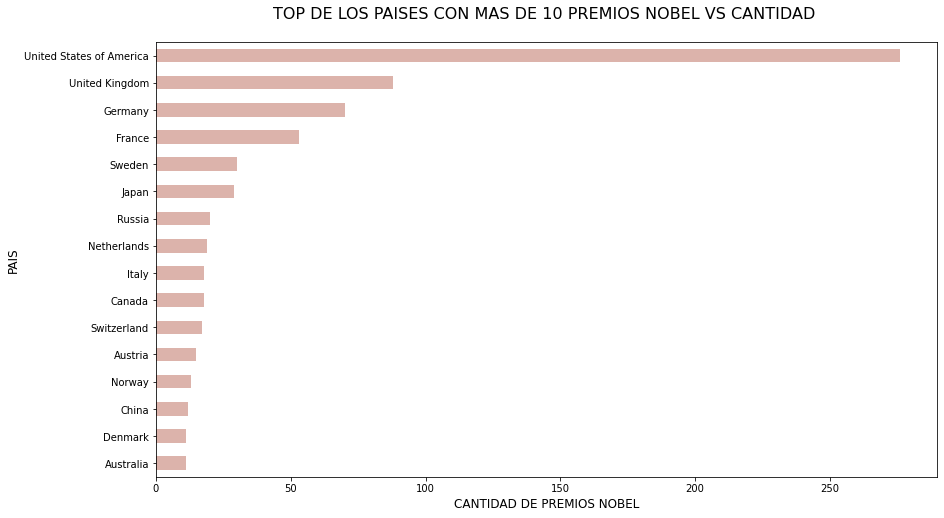

In [ ]:
group_country_cant_nobel.plot.barh(color="#D4A096",figsize=(14,8),alpha = 0.8); # ANCHO - ALTURA
plt.title('TOP DE LOS PAISES CON MAS DE 10 PREMIOS NOBEL VS CANTIDAD \n',fontdict={'fontsize':16})
plt.ylabel('PAIS',fontsize='large')
plt.xlabel('CANTIDAD DE PREMIOS NOBEL',fontsize='large')
plt.show()

In [ ]:
# PASO N° 4: MOSTRAREMOS AGRUPAMIENTO DE PAISES VS LA CATEGORIA DE LOS PREMIOS NOBEL'S

group_category_country = pd.crosstab(index = dataset['Birth Country'],
                            columns = [dataset['Category']],
                            margins = True)
group_category_country = group_category_country.sort_values(by="All", ascending=False)
group_category_country

# INTERPRETACION:
# Se observa que United States of America, United Kingdom y Germany son los paises con >= 70 premios nobel's

Category,Chemistry,Economics,Literature,Medicine,Peace,Physics,All
Birth Country,,,,,,,
All,194,83,113,227,104,222,943
United States of America,57,47,9,74,19,70,276
United Kingdom,22,7,6,26,5,22,88
Germany,23,1,4,18,5,19,70
France,10,3,11,12,9,8,53
...,...,...,...,...,...,...,...
British Protectorate of Palestine (Israel),1,0,0,0,0,0,1
Nigeria,0,0,1,0,0,0,1
British West Indies (Saint Lucia),0,1,0,0,0,0,1


In [ ]:
# MOSTREMOS LOS PAISES QUE TIENEN MAS DE 10 PREMIOS NOBEL'S
group_cat_country_greater_10 = group_category_country[group_category_country["All"]>10]
group_cat_country_greater_10

Category,Chemistry,Economics,Literature,Medicine,Peace,Physics,All
Birth Country,,,,,,,
All,194,83,113,227,104,222,943
United States of America,57,47,9,74,19,70,276
United Kingdom,22,7,6,26,5,22,88
Germany,23,1,4,18,5,19,70
France,10,3,11,12,9,8,53
Sweden,5,2,7,7,5,4,30
Japan,7,0,2,5,1,14,29
Russia,4,2,4,1,1,8,20
Netherlands,5,2,0,2,1,9,19


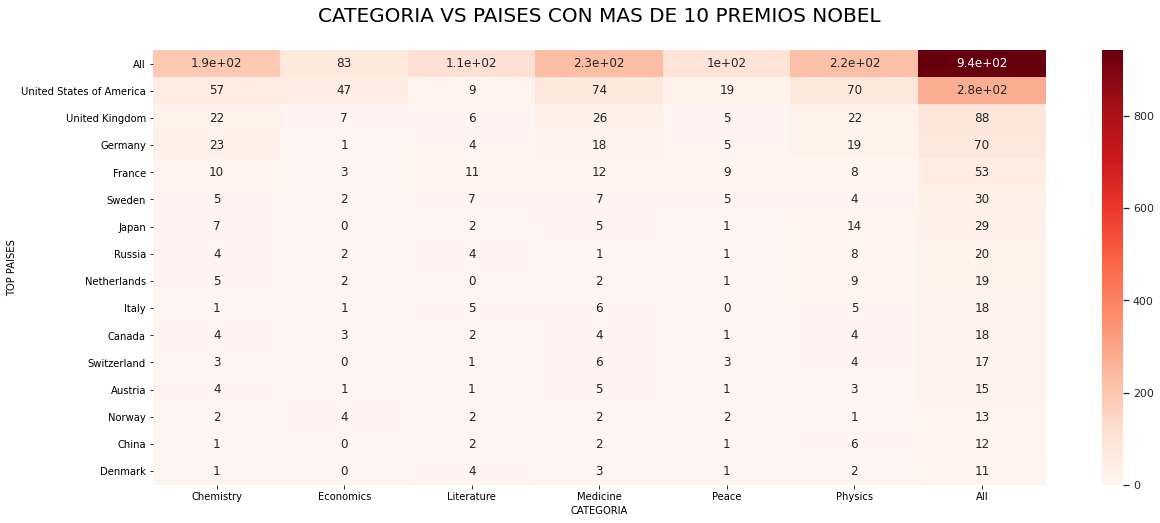

In [ ]:
# GRACIAS AL GRAFICO DE COLOR VEREMOS QUE PAISES TIENEN MAS PREMIOS NOBEL'S POR CATEGORIA

fig, ax = plt.subplots(figsize=(20,8)) 
sns.set(font_scale=1)
sns.heatmap(group_category_country.head(16),annot=True,cmap="Reds",
           )
plt.title('CATEGORIA VS PAISES CON MAS DE 10 PREMIOS NOBEL\n',fontdict={'fontsize':20})
plt.xlabel('CATEGORIA')
plt.ylabel('TOP PAISES')
plt.show()

In [ ]:
# CONCLUSION DE ESTE ITEM

# DEL GRAFICO DE COLOR SE CONCLUYE QUE:
# - "United States of America" se lleva el 1er lugar en 5 categorias (Chemisty,Economics,Medicine,Peace.Physics)
# - "francie" es el unico pais se lleva el 1er lugar en 1 categoria (Literature)

# LA UNICA CATEGORIA QUE TIENE COMO GANADORES A LAURATE DE TIPO ORGANIZACION ES "Peace";
#   ESTOS 30 REGISTROS DE TIPO ORGANIZACION REPRESENTAN EL 3% DE TODOS LOS PREMIOS NOBEL'S ENTREGADOS

# EL PAIS QUE HA GANADO MAS PREMIO EN GENERAL ES : "United States of America" CON 276 PREMIOS NOBEL'S, QUEDANDO EN 2DO LUGAR: "United Kingdom" CON 70  PREMIOS NOBEL'S
# El 46,3% DE LOS PREMIOS NOBEL'S ENTREGADOS PERTENECEN A LA CATEGORIA "Medicine" Y "Physics"

## **¿Qué palabras se escriben con más frecuencia en la motivación del premio?** 


In [ ]:
comment_words = '' 
stopwords = set(STOPWORDS) 

In [ ]:
def show_wordcloud(data):
  for word in data.Motivation:
    comment_words = ''
    word = str(word)
    msg = word.replace('"', ' ').strip().split()
    comment_words += " ".join(msg)+" "
  
  wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words)

  plt.figure(figsize = (4, 4), facecolor = None) 
  plt.imshow(wordcloud) 
  plt.axis("off") 
  plt.tight_layout(pad = 0) 
  plt.show() 

In [ ]:
# Haciendo cada celda de la columna Motivation una lista, sin comillas y agregandola a una variable con todas las palabras
for word in dataset.Motivation:
    word = str(word)
    msg = word.replace('"', ' ').strip().split()
    comment_words += " ".join(msg)+" "


In [ ]:
# Instanciando el wordCloud
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words)

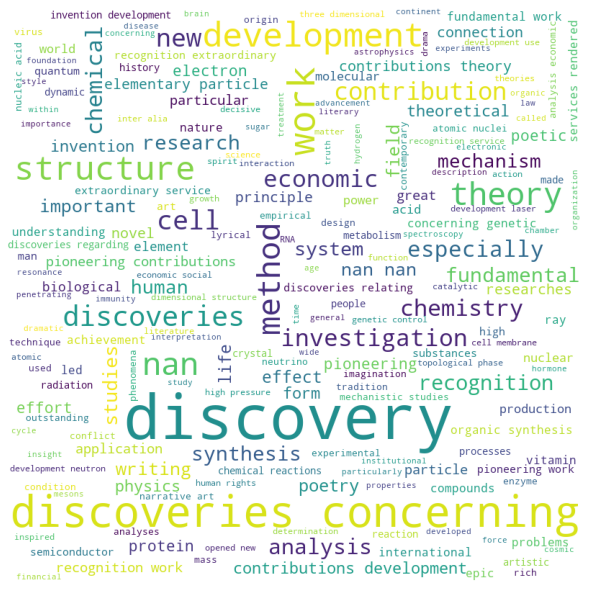

In [ ]:
# WORDCLOUD DE TODOS LOS MENSAJES EN GENERAL                 
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

In [ ]:
# WORDCLOUD POR CADA CATEGORIA

wordcloud_Chemistry = dataset[dataset['Category'] == "Chemistry"]
wordcloud_Economics = dataset[dataset['Category'] == "Economics"]
wordcloud_Medicine = dataset[dataset['Category'] == "Medicine"]
wordcloud_Peace = dataset[dataset['Category'] == "Peace"]
wordcloud_Physics = dataset[dataset['Category'] == "Physics"]
wordcloud_Literature = dataset[dataset['Category'] == "Literature"]

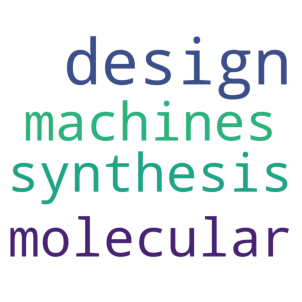

In [ ]:
show_wordcloud(wordcloud_Chemistry)

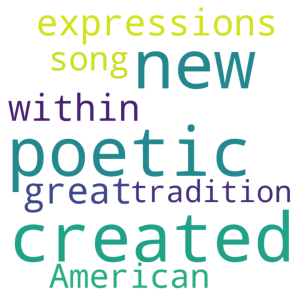

In [ ]:
show_wordcloud(wordcloud_Literature)

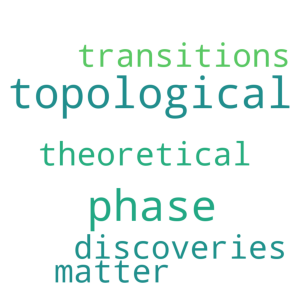

In [ ]:
show_wordcloud(wordcloud_Physics)

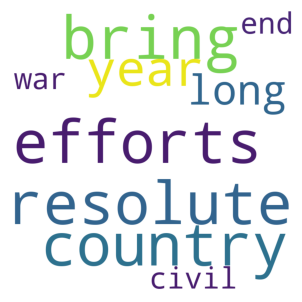

In [ ]:
show_wordcloud(wordcloud_Peace)

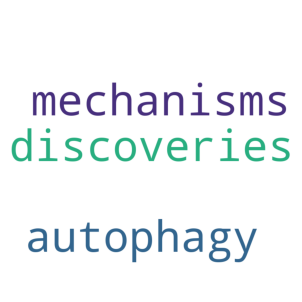

In [ ]:
show_wordcloud(wordcloud_Medicine)

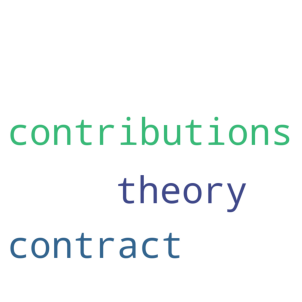

In [ ]:
show_wordcloud(wordcloud_Economics)

In [ ]:
# DEL GRAFICO PRINCIPAL:
# - La palabra que mas se repite en general en los discursos son: "discovery", "discoveries" y "corcening"

# DE LOS GRAFICOS POR ETAPA:
# - (Chemistry) La palabra que mas se repite en general en los discursos son: "design", "molecular","machines","synthesis".
# - (Literature) La palabra que mas se repite en general en los discursos son: "new", "poetic","creates".
# - (Physics) La palabra que mas se repite en general en los discursos son: "phase", "topological","discoveries".
# - (Peace) La palabra que mas se repite en general en los discursos son: "efforts", "bring","resolutes".
# - (Medicine) La palabra que mas se repite en general en los discursos son: "mechanisms", "discoveries","autophagy".
# - (Economics) La palabra que mas se repite en general en los discursos son: "contributions", "theory","contract".

## **¿Puede predecir la edad, el sexo y la nacionalidad de los premios Nobel del próximo año?** 

In [ ]:
dataset.head(2)

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France


In [ ]:
# PASO N°1: Copia del dataframe
df = dataset.copy(True)

In [ ]:
df.shape

(969, 18)

In [ ]:
# PROCESAMIENTO
# ---------------
# DATOS DE FECHA DE NACIMIENTO VACIO (SE REEMPLAZA POR LA MEDIA DE LOS AÑOS)
# CALCULAR LA EDAD DE LA PERSONA QUE RECIBIO EL NOBEL
# TENER AÑO VS EDAD PROMEDIO DE LOS PREMIOS NOBEL

In [ ]:
df['Birth Date'].isnull().sum()

# INTERPRETACION
# Se encontro 29 datos nulos

29

In [ ]:
# REEMPLAZANDO LOS VALORES NULOS POR CERO PARA LEVANTAR LOS NAN
df['Birth Date'] = df['Birth Date'].fillna(df['Birth Date'].fillna(0))

In [ ]:
# GENERAR LA COLUMNA CON EDAD
arrEdad=[]

for index,value in enumerate(df['Birth Date']):
  if len(str(value)) == 4:
    edad = int(df['Year'][index]) - int(value)
  elif value != 0:
    value = value[0:4]
    edad = int(df['Year'][index]) - int(value)
  else:
    edad = value
  arrEdad.append(edad)

df['Edad'] = arrEdad

In [ ]:
cant_edad = df[df['Birth Date'] == 0]['Birth Date'].count()
cant_edad

29

In [ ]:
prom_edad = df['Edad'].sum() / (df.shape[0] - cant_edad)
prom_edad

59.48510638297872

In [ ]:
# REEMPLAZEMOS LOS "0" POR EL PROMEDIO
for index,value in enumerate(df['Edad']):
  if value == 0:
    df['Edad'][index] = int(prom_edad)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
groupYear= df.groupby("Year").agg({'Edad':'median'})
groupYear

,Edad
Year,
1901,59.0
1902,50.0
1903,44.0
1904,60.5
1905,62.0
...,...
2012,68.0
2013,66.5
2014,60.0


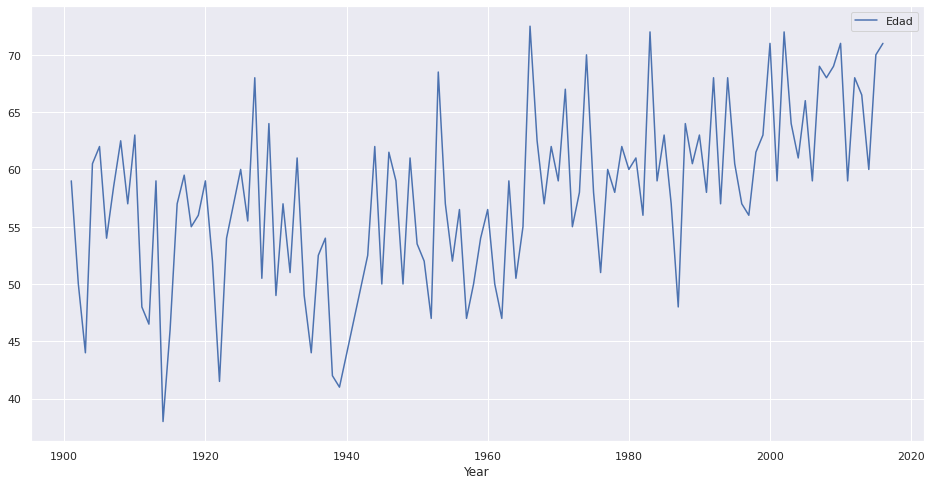

In [ ]:
# OBSERVACION: Podemos visualizar el promedio de las personas que reciben el premio nobel's por año
groupYear.plot(figsize=(16,8))
plt.show()

In [ ]:
### PENDIENTE ES ENCONTRAR UN PATRON PARA LOGRAR PREDECIR LA EDAD DEL SGTE PREMIO NOBEL'S !!

### **VARIABLE NUEVA CREADA "EDAD"**

In [ ]:
# YA QUE GRACIAS AL ANALISIS ANTERIOR SE TIENE LA VARIABLE EDAD EMPEZEMOS A ANALIZARLA

In [ ]:
df.head(3)

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country,Edad
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany,49
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France,62
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany,47


In [ ]:
df.describe()

,Year,Laureate ID,Edad
count,969.000000,969.000000,969.000000
mean,1970.287926,470.152735,59.470588
std,32.937498,274.586623,12.178061
min,1901.000000,1.000000,17.000000
25%,1947.000000,230.000000,51.000000
50%,1976.000000,462.000000,59.000000
75%,1999.000000,718.000000,68.000000
max,2016.000000,937.000000,90.000000


In [ ]:
# INTERPRETACION EDAD
#
# - La edad minima es 17
# - La edad maxima es 90
# - La edad media es 59
# - el 25% de los que ganaron el premio nobel pasan de los 68 años
# - El 50% de los ganadores tienes entre 51 y 68 años

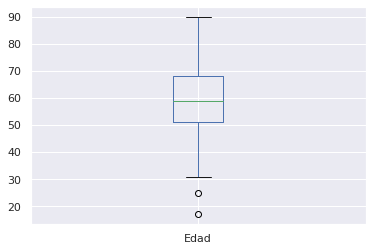

In [ ]:
df['Edad'].plot(kind='box') 

# INTERPRETACION EDAD
# Se ven 2 valores atipicos ( Que estan muy diferenciados de los demas valores)

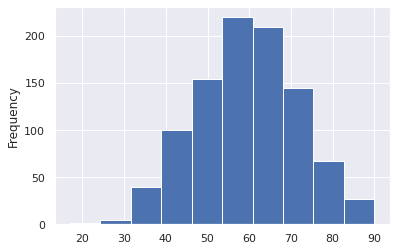

In [ ]:
df['Edad'].plot(kind='hist');

# INTERPRETACION EDAD
# Como indicaba el describe la media es 59 y se ve que es una distribucion seminormal
# Se ven que los datos estan muy cerca a la media

In [ ]:
# VEAMOS LOS VALORES HOLDLAYER
df[df['Edad'] < 30]

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country,Edad
86,1915,Physics,The Nobel Prize in Physics 1915,"""for their services in the analysis of crystal...",1/2,21,Individual,William Lawrence Bragg,1890-03-31,Adelaide,Australia,Male,Victoria University,Manchester,United Kingdom,1971-07-01,Ipswich,United Kingdom,25
940,2014,Peace,The Nobel Peace Prize 2014,"""for their struggle against the suppression of...",1/2,914,Individual,Malala Yousafzai,1997-07-12,Mingora,Pakistan,Female,NaN,NaN,NaN,NaN,NaN,NaN,17


In [ ]:
# INTERPRETACION EDAD
# Podemos observar que de los valores HOLDLAYER la edades fueron:
# Malala Yousafzai Jovencita con solo 17 años gano un premio nobel categoria "peace", pais Pakistan, año 1915
# William Lawrence Bragg Jovencito con 25 años gano un premio nobel categoria "Physics", pais Australia, año 2014

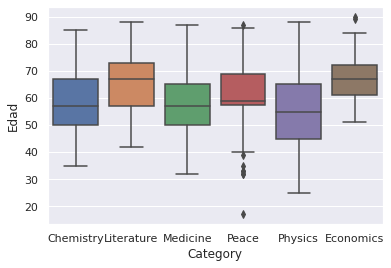

In [ ]:
sns.boxplot(data = df,x='Category',y='Edad')

In [ ]:
# INTERPRETACION EDAD
# Se puede observar que las edades vs las categorias se encontraran holdlayer en las siguiente categorias: "Peace" y "Economics"
# Que en la categoria Peace se observa que los valores de las edades sobrepasan la media de esta categoria
# En la categoria Literatura se ve que gran cnatidad de los datos son menores a la media.

## **🌟 TEAMS PARSEL 🐍 PRESENTE !!**

<img src="https://i.ibb.co/jJmBdxL/Screenshot-8.png" alt="Screenshot-8" border="0" height=400px>